Analyzing the performance of selected stocks and the benchmark index (S&P 500) using the yfinance  library

### Import relevant libraries

In [1]:
# libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
from datetime import datetime

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

ImportWarning('ignore')

ImportWarning('ignore')

## Data Extraction

We will extract data for primary stock = PepsiCo (PEP), Competitor stock = Coca-Cola (KO), and the market indexS&P 500 (GSPC) for the past 4 years.


In [2]:
end = datetime(2024, 12, 2)
start = datetime(end.year - 4, end.month, end.day)

# Define the stock tickers
primary_stock = 'PEP'  # PepsiCo
competitor_stock = 'KO'  # Coca-Cola

bench_mark_index = '^GSPC' #S&P 500

In [3]:
pep_data = yf.download(primary_stock, start, end)

pep_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,PEP,PEP,PEP,PEP,PEP
Date,,,,,
2020-12-02,126.872543,128.907844,126.232131,127.977927,4432900
2020-12-03,127.626221,128.076831,126.362776,126.362776,4757900
2020-12-04,128.863129,128.977979,127.096065,127.113726,3592600
2020-12-07,128.439056,129.490462,127.776407,128.712949,4217300
2020-12-08,128.571548,129.137008,127.484795,128.403675,3623800


In [4]:
co_data = yf.download(competitor_stock, start, end)

co_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2020-12-02,45.817348,45.834934,45.404103,45.632708,14913100
2020-12-03,46.406425,46.547104,45.632694,45.632694,17318900
2020-12-04,47.347214,47.364799,46.388839,46.406424,18122400
2020-12-07,46.591072,47.285671,46.336091,47.268086,16210900
2020-12-08,46.758129,47.021901,46.415225,46.547109,12485800


In [5]:
index_data = yf.download(bench_mark_index, start, end)

index_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-12-02,3669.010010,3670.959961,3644.840088,3653.780029,5041250000
2020-12-03,3666.719971,3682.729980,3657.169922,3668.280029,5065340000
2020-12-04,3699.120117,3699.199951,3670.939941,3670.939941,5099620000
2020-12-07,3691.959961,3697.409912,3678.879883,3694.729980,4804500000
2020-12-08,3702.250000,3708.449951,3678.830078,3683.050049,4584390000


### Create adjClose Feature from Close Column

In [6]:
# Feature Engineering Function
def add_adjclose(adjclose):
    # Adj Close
    adjclose['Adj Close'] = adjclose['Close']

# Apply the function
add_adjclose(pep_data)
add_adjclose(co_data)
add_adjclose(index_data)

In [7]:
pep_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close
Ticker,PEP,PEP,PEP,PEP,PEP,
Date,,,,,,
2020-12-02,126.872543,128.907844,126.232131,127.977927,4432900,126.872543
2020-12-03,127.626221,128.076831,126.362776,126.362776,4757900,127.626221


In [8]:
co_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close
Ticker,KO,KO,KO,KO,KO,
Date,,,,,,
2020-12-02,45.817348,45.834934,45.404103,45.632708,14913100,45.817348
2020-12-03,46.406425,46.547104,45.632694,45.632694,17318900,46.406425


In [9]:
index_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2020-12-02,3669.010010,3670.959961,3644.840088,3653.780029,5041250000,3669.010010
2020-12-03,3666.719971,3682.729980,3657.169922,3668.280029,5065340000,3666.719971


## Feature Engineering
Adding features such as ,  (next day's adjusted close price), and  (binary indicator for price movement direction).

In [10]:
# Feature Engineering Function
def add_features(data):
    # Daily Return
    data['Daily Return'] = data['Adj Close'].pct_change()
    # Tomorrow's Price
    data['Tomorrow'] = data['Adj Close'].shift(-1)
    # Stock Direction (1 = Price went up, 0 = Price went down)
    data['Stock Direction'] = (data['Tomorrow'] > data['Adj Close']).astype(int)

# Apply the function
add_features(pep_data)
add_features(co_data)
add_features(index_data)

### Preview the updated data

In [11]:
pep_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Tomorrow,Stock Direction
Ticker,PEP,PEP,PEP,PEP,PEP,,,,
Date,,,,,,,,,
2020-12-02,126.872543,128.907844,126.232131,127.977927,4432900,126.872543,NaN,127.626221,1
2020-12-03,127.626221,128.076831,126.362776,126.362776,4757900,127.626221,0.00594,128.863129,1


In [12]:
co_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Tomorrow,Stock Direction
Ticker,KO,KO,KO,KO,KO,,,,
Date,,,,,,,,,
2020-12-02,45.817348,45.834934,45.404103,45.632708,14913100,45.817348,NaN,46.406425,1
2020-12-03,46.406425,46.547104,45.632694,45.632694,17318900,46.406425,0.012857,47.347214,1


In [13]:
index_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Tomorrow,Stock Direction
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,
Date,,,,,,,,,
2020-12-02,3669.010010,3670.959961,3644.840088,3653.780029,5041250000,3669.010010,NaN,3666.719971,0
2020-12-03,3666.719971,3682.729980,3657.169922,3668.280029,5065340000,3666.719971,-0.000624,3699.120117,1


## Exploratory Data Analysis

Investigate historical trends, returns, and volatility for each stock.

### Historical Trends
Visualizing the Adjusted Close prices over time.

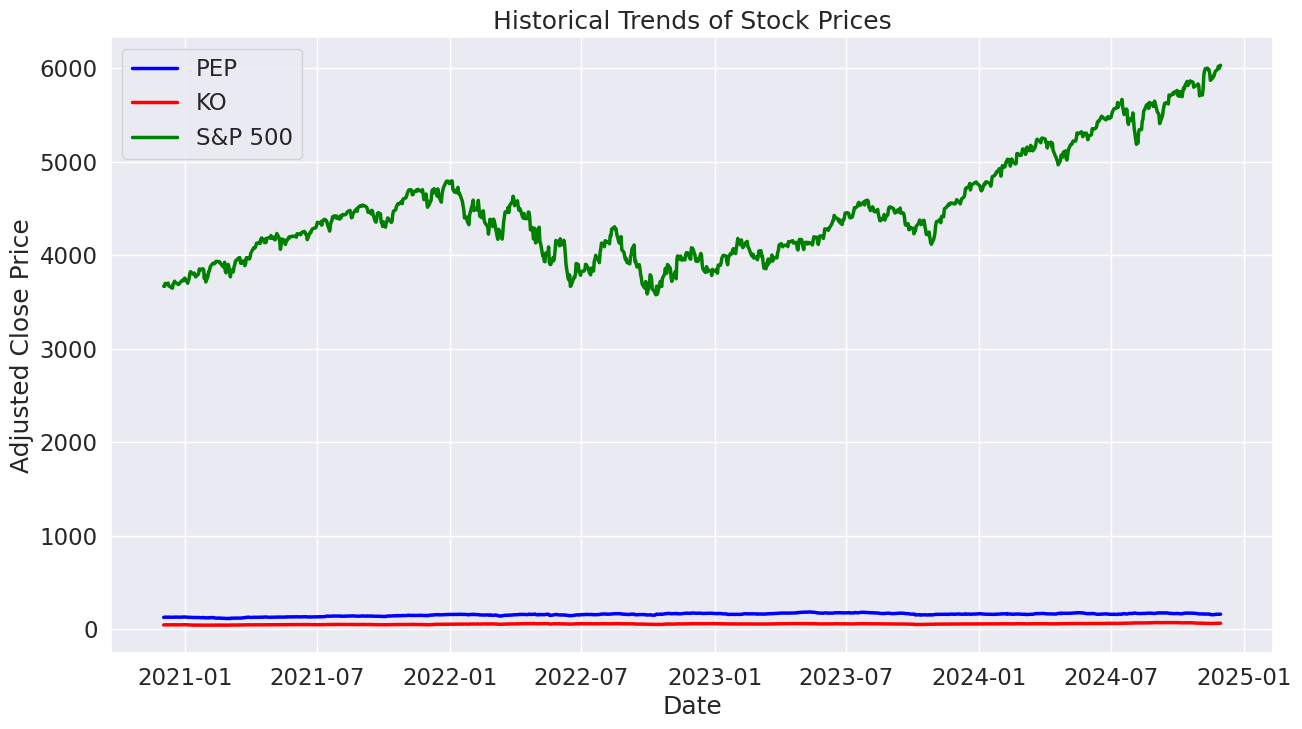

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(pep_data['Adj Close'], label='PEP', color='blue')
plt.plot(co_data['Adj Close'], label='KO', color='red')
plt.plot(index_data['Adj Close'], label='S&P 500', color='green')
plt.title('Historical Trends of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
#plt.grid(True)
plt.show()

### Volatility Analysis
Analyzing the distributions of daily returns.

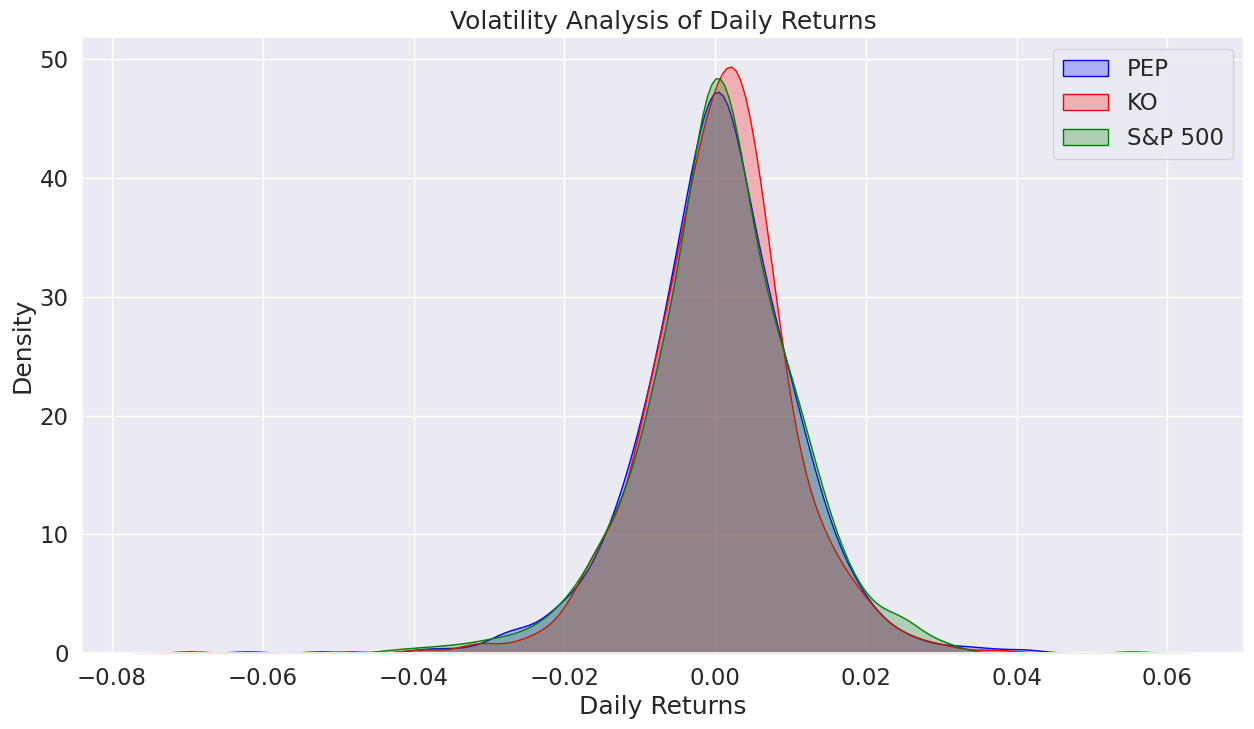

In [15]:
plt.figure(figsize=(15, 8))

sns.kdeplot(pep_data['Daily Return'].dropna(), label='PEP', fill=True, color='blue')
sns.kdeplot(co_data['Daily Return'].dropna(), label='KO', fill=True, color='red')
sns.kdeplot(index_data['Daily Return'].dropna(), label='S&P 500', fill=True, color='green')

plt.title('Volatility Analysis of Daily Returns')
plt.xlabel('Daily Returns')
plt.legend()
# plt.grid(True)
plt.show()

## Dynamic Visualizations

Showcase pricing trends and highlight sector impacts.

### Dynamic Pricing Trends
Visualizing trends with overlapping time series.

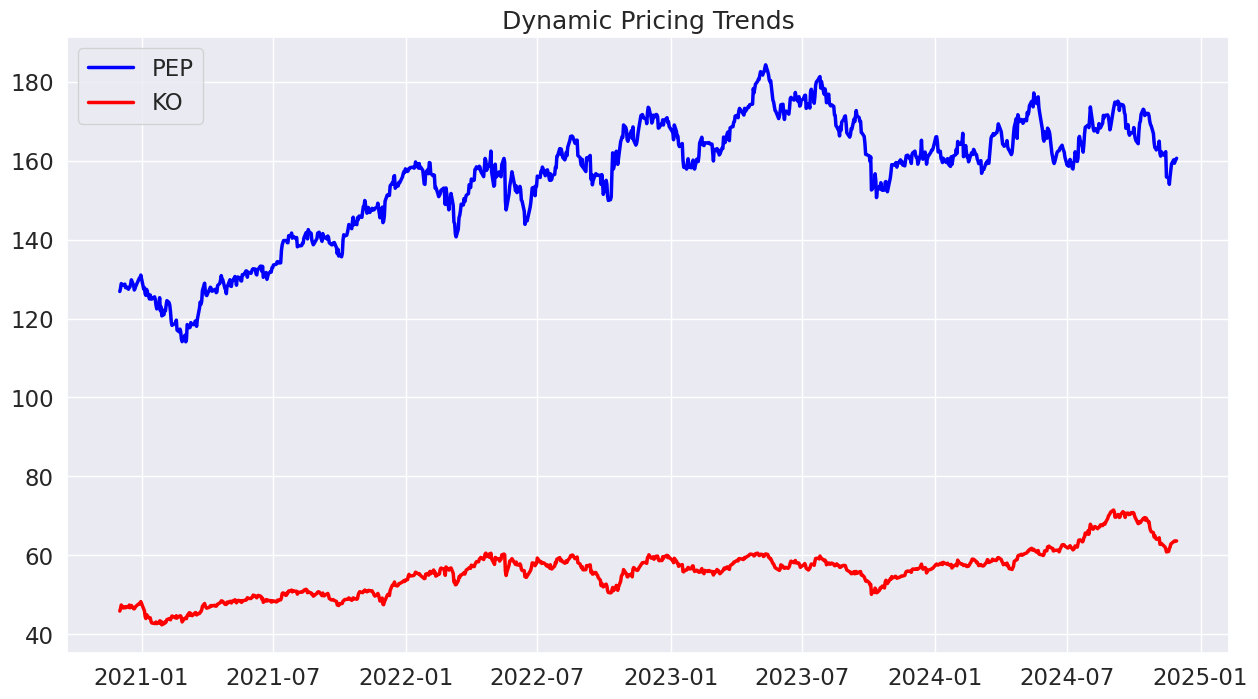

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(pep_data['Adj Close'], label='PEP', color='blue')
plt.plot(co_data['Adj Close'], label='KO', color='red')
plt.title('Dynamic Pricing Trends')
plt.legend()
#plt.grid(True)
plt.show()

## Comparative Analysis
### Correlation Analysis:
Evaluate relationships between each stock and the benchmark index.

In [17]:
primary_vs_benchmark_corr = pep_data['Adj Close'].corr(index_data['Adj Close'])
competitor_vs_benchmark_corr = co_data['Adj Close'].corr(index_data['Adj Close'])

print(f"Correlation Between PEP and S&P 500: {primary_vs_benchmark_corr}")
print(f"Correlation Between KO and S&P 500: {competitor_vs_benchmark_corr}")

Correlation Between PEP and S&P 500: 0.38131846541200765
Correlation Between KO and S&P 500: 0.6451511503354637


In [18]:
# Calculated correlation values
correlations = pd.DataFrame({
    'Stock': ['PEP', 'KO'],
    'Correlation with S&P 500': [
        pep_data['Adj Close'].corr(index_data['Adj Close']),
        co_data['Adj Close'].corr(index_data['Adj Close'])
    ]
})

# Create a bar plot
fig_corr = px.bar(
    correlations,
    x='Stock',
    y='Correlation with S&P 500',
    title='Correlation with S&P 500',
    text='Correlation with S&P 500',
    labels={'Correlation with S&P 500': 'Correlation Coefficient'}
)
fig_corr.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_corr.show()

### Volatility Analysis:
Compute the standard deviation of daily returns to assess risk levels.

In [19]:
primary_volatility = pep_data['Daily Return'].std()
competitor_volatility = co_data['Daily Return'].std()
benchmark_volatility = index_data['Daily Return'].std()

print(f"PEP Daily Return Volatility: {primary_volatility}")
print(f"KO Daily Return Volatility: {competitor_volatility}")
print(f"S&P 500 Daily Return Volatility: {benchmark_volatility}")

PEP Daily Return Volatility: 0.0103388737792557
KO Daily Return Volatility: 0.009784625313272368
S&P 500 Daily Return Volatility: 0.01034385713242184


In [20]:
# Calculated volatility values
volatility = pd.DataFrame({
    'Stock': ['PEP', 'KO', 'S&P 500'],
    'Volatility': [
        pep_data['Daily Return'].std(),
        co_data['Daily Return'].std(),
        index_data['Daily Return'].std()
    ]
})

# Create a bar plot
fig_volatility = px.bar(
    volatility,
    x='Stock',
    y='Volatility',
    title='Daily Return Volatility',
    text='Volatility',
    labels={'Volatility': 'Standard Deviation'}
)
fig_volatility.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig_volatility.show()

In [21]:
# Compute average returns
volatility_returns = pd.DataFrame({
    'Stock': ['PEP', 'KO', 'S&P 500'],
    'Volatility': [
        pep_data['Daily Return'].std(),
        co_data['Daily Return'].std(),
        index_data['Daily Return'].std()
    ],
    'Avg Return': [
        pep_data['Daily Return'].mean(),
        co_data['Daily Return'].mean(),
        index_data['Daily Return'].mean()
    ]
})

# Create a scatter plot
fig_vol_returns = px.scatter(
    volatility_returns,
    x='Volatility',
    y='Avg Return',
    color='Stock',
    size='Volatility',
    hover_name='Stock',
    title='Volatility vs. Average Daily Return',
    labels={'Volatility': 'Volatility (Standard Deviation)', 'Avg Return': 'Average Return'}
)
fig_vol_returns.show()

In [22]:
# Add daily returns to a single DataFrame for visualization
pep_data['Type'] = 'PEP'
co_data['Type'] = 'KO'
index_data['Type'] = 'S&P 500'

# Reset index to make 'Date' a column
pep_data = pep_data.reset_index()
co_data = co_data.reset_index()
index_data = index_data.reset_index()

daily_returns = pd.concat([pep_data[['Date', 'Daily Return', 'Type']],
                           co_data[['Date', 'Daily Return', 'Type']],
                           index_data[['Date', 'Daily Return', 'Type']]])

# Create an interactive line plot
fig_returns = px.line(
    daily_returns,
    x='Date',
    y='Daily Return',
    color='Type',
    title='Daily Return Trends Over Time',
    labels={'Daily Return': 'Daily Return', 'Date': 'Date'}
)
fig_returns.show()

Comparative Insights:

The results from correlation and volatility analysis provide insights into the suitability of each stock for investment relative to market performance.

## Analysis Insights/Observations
1. Historical Trends:
- The Adjusted Close prices of PepsiCo (PEP), Coca-Cola (KO), and the S&P 500 index (^GSPC) exhibit a steady upward trend over the last four years, indicating overall market growth during this period.
-There are instances of dips in stock prices, likely corresponding to external economic events or company-specific challenges

2. Volatility:
- PEP shows relatively lower volatility compared to KO and S&P 500, which suggests it may be a less risky investment option.
- KO exhibits moderate volatility, implying a balance between risk and reward.
- The S&P 500 index demonstrates the highest volatility, reflecting its broader exposure to market fluctuations and external shocks.

3. Daily Returns:
- The distribution of daily returns for all three shows typical behavior: a central concentration near zero and some sporadic spikes. PEP’s daily returns distribution is narrower than KO’s, indicating more consistent performance.

4. Correlation Analysis:
- Both PEP and KO have positive correlations with the S&P 500, with PEP slightly stronger. This suggests their performance aligns reasonably well with overall market trends.
- The correlation insights imply that PEP is slightly more in sync with market benchmarks than KO, which is beneficial for predicting future behaviors.

5. Volatility vs. Returns:
- PEP’s lower volatility comes with relatively steady returns, indicating it as a stable option for long-term investments.
- KO’s higher volatility might attract investors looking for a slightly more aggressive strategy, but its average returns are similar to PEP.
- The S&P 500 offers broader exposure but carries significant volatility, suggesting it’s better suited for diversified portfolios

6. Stock Directions:
- The direction analysis highlights that PEP has more instances of upward price movement compared to KO, which may indicate better market confidence in PEP's performance.

## Recommendations

1. Investment Strategy:
- For risk-averse investors, PepsiCo (PEP) appears to be the better option due to its lower volatility and stable upward price trend.
- Coca-Cola (KO), with its higher volatility, may appeal to those looking for moderate-risk investments with comparable returns.

2. Portfolio Diversification:
Including the S&P 500 index (^GSPC) in the portfolio can add diversification and broader market exposure, though investors should be prepared to handle greater volatility.

3. Monitor Market Conditions:
- Regularly track external factors such as economic events, sector trends, and company-specific updates to align investment decisions with prevailing market conditions.

4. Focus on Stability:
- For long-term investment goals, prioritize stocks with lower volatility and consistent returns, such as PepsiCo.


## Conclusion
The exploratory data analysis provides valuable insights into the performance, volatility, and correlation of PepsiCo, Coca-Cola, and the S&P 500 index over the past four years. PEP stands out as a stable investment option with steady returns and less volatility, while KO offers slightly more risk for similar average returns. The S&P 500 index provides exposure to broader market trends but carries higher risk.
Investors should consider these factors alongside their financial goals and risk appetite. By balancing stability, growth potential, and market exposure, a diversified portfolio can be constructed to optimize returns while minimizing risk. Regular monitoring and analysis are essential for adapting to market fluctuations and ensuring alignment with investment strategies.
